In [3]:
# !pip install uform

In [4]:
from uform.gen_model import VLMForCausalLM, VLMProcessor

model = VLMForCausalLM.from_pretrained("unum-cloud/uform-gen-chat")
processor = VLMProcessor.from_pretrained("unum-cloud/uform-gen-chat")


/root/miniconda3/envs/poc_vqa/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Loading checkpoint shards: 100%|██████████| 2/2 [00:39<00:00, 20.00s/it]
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [5]:
import requests
from PIL import Image
from matplotlib.pyplot import imshow

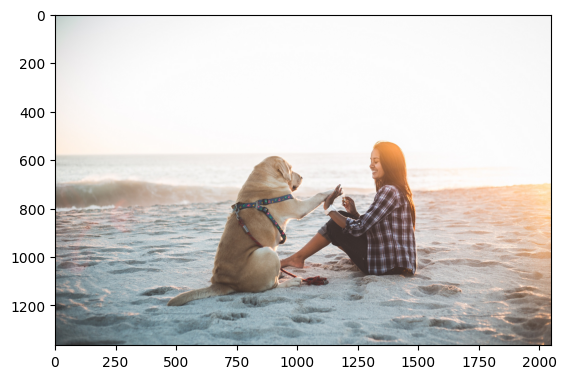

In [13]:
prompt = "What colors are the woman's blouse?"
url = "https://storage.googleapis.com/sfr-vision-language-research/BLIP/demo.jpg"
img = Image.open(requests.get(url, stream=True).raw, 'r')

imshow(img)

In [8]:
image = Image.open(requests.get(url, stream=True).raw)

In [14]:
import torch

inputs = processor(texts=[prompt], images=[image], return_tensors="pt")
with torch.inference_mode():
     output = model.generate(
        **inputs,
        do_sample=False,
        use_cache=True,
        max_new_tokens=128,
        eos_token_id=32001,
        pad_token_id=processor.tokenizer.pad_token_id
    )

In [15]:
prompt_len = inputs["input_ids"].shape[1]
decoded_text = processor.batch_decode(output[:, prompt_len:])[0]

In [16]:
decoded_text

"The woman's blouse is pink.<|im_end|>"